<a href="https://colab.research.google.com/github/zehavitc/NLP/blob/master/NLP_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW3**

Matan Sabag 301388567

Zehavit Leibovich 305226391

Part 1

In [0]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
import gensim.downloader as api

In [0]:
def load(model_name):
  '''
  Downloading and loading model into memory, as a dictionary of arrays, the keys are the words.
  '''
  wv_from_bin = api.load(model_name)
  vocab = list(wv_from_bin.vocab.keys())
  print("Loaded vocab size %i" % len(vocab))
  return wv_from_bin
  

Part 2 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
analogy_file_path = "/content/drive/My Drive/NLP/HW3/analogy.txt"

In [7]:
from gensim.test.utils import datapath
import pandas as pd
import gc


groups_names = ["capital-world", "currency", "city-in-state", "family", "gram1-adjective-to-adverb", "gram2-opposite", "gram3-comparative", "gram6-nationality-adjective"]
models_names = ["glove-wiki-gigaword-300","glove-wiki-gigaword-50","word2vec-google-news-300", "glove-twitter-200", "fasttext-wiki-news-subwords-300"]

results = pd.DataFrame(columns = groups_names + ["Overall"])
for model_name in models_names:
  model = load(model_name)
  analogy_score, sections = model.wv.evaluate_word_analogies(datapath(analogy_file_path))
  results.loc[model_name, "Overall"] = analogy_score
  for section in sections:
    group_name = section['section']
    if group_name in groups_names:
      results.loc[model_name, group_name] =  len(section['correct']) / (len(section['correct']) + len(section['incorrect']))
  del model
  gc.collect()
  
results
  

Loaded vocab size 400000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Loaded vocab size 400000
Loaded vocab size 3000000
Loaded vocab size 1193514
Loaded vocab size 999999


,capital-world,currency,city-in-state,family,gram1-adjective-to-adverb,gram2-opposite,gram3-comparative,gram6-nationality-adjective,Overall
glove-wiki-gigaword-300,0.95977,0.170792,0.593028,0.881423,0.225806,0.273399,0.881381,0.925578,0.719542
glove-wiki-gigaword-50,0.685013,0.0903465,0.153223,0.689723,0.152218,0.0948276,0.518018,0.860538,0.463718
word2vec-google-news-300,0.813187,0.284653,0.721119,0.86166,0.292339,0.434729,0.912913,0.901814,0.740145
glove-twitter-200,0.745678,0.0327511,0.356303,0.794737,0.126882,0.308333,0.742492,0.727421,0.566846
fasttext-wiki-news-subwords-300,0.97458,0.332921,0.833806,0.857708,0.703629,0.633005,0.96997,0.929331,0.882788


Part 3

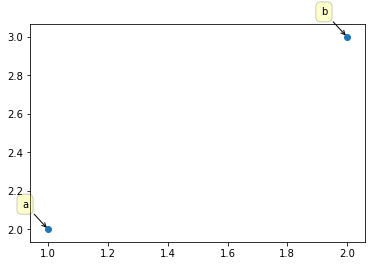

In [8]:
def show_embeddings(data, labels):
    plt.scatter(data[:, 0], data[:, 1], marker='o')

    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Testing        
show_embeddings(np.array([[1, 2],[2, 3]]), ["a","b"])

In [0]:
from sklearn.decomposition import TruncatedSVD

def reduce_dim(model, number_of_vectors=10000, required_words=["car"]):
  '''
  number_of_vectors: you should first truncate your model to only this number of vectors. Make sure to shuffle the model first, so that you choose random vectors.
  required_words: in addition to the number_of_vectors vectors you keep, you should keep the vectors of these words.
  Return the new, reduced model.
  '''
  words = list(model.vocab.keys())
  np.random.shuffle(words)
  X = []
  for word in (words[:number_of_vectors] + required_words):
    X.append(model.get_vector(word))
    
  X = np.asarray(X)
  reducer  = TruncatedSVD(n_components = 2)
  reducer.fit(X)
  return reducer.transform(X)
  

Loaded vocab size 400000


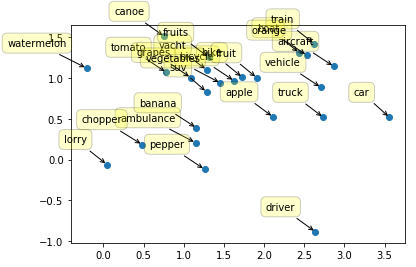

In [10]:
required_words = ["aircraft", "ambulance", "bicycle", "bike", "boat", "car", "truck", "chopper", "canoe", "driver", "lorry", "suv", "train",
                  "vehicle", "yacht", "apple", "banana", "orange", "tomato", "pepper", "watermelon", "grapes", "fruit", "fruits", "vegetables"]
model = load("glove-wiki-gigaword-50")
reduced_model = reduce_dim(model, number_of_vectors=10000, required_words=required_words)
show_embeddings(reduced_model[10000:], required_words)
del model

Part 4 

In [11]:
from gensim.models import Word2Vec
import nltk
nltk.download('brown')
from nltk.corpus import brown
brown_w2v = Word2Vec(brown.sents())

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [0]:
def get_term_sentences(corpus, term):
  res = []
  for sentence in corpus.sents():
    str_sent = ' '.join(sentence)
    lowered_sent = str_sent.lower() 
    if term in lowered_sent:
      res.append(str_sent)
  return res
  

In [0]:
def get_word_vector(model_w2v, word):  
  if word in model_w2v:
    return model_w2v[word]
  
  if word.lower() in model_w2v:
    return model_w2v[word.lower()]
  
  return None

In [0]:
def get_neighbour_words(sentences, term, take_before):
  res = []
  for sentence in sentences:
    words = sentence.split()
    term_idx = [i for i, word in enumerate(words) if word == term]
    for idx in term_idx:
      if take_before:
        if idx > 0:
          res.append(words[idx - 1])
        if idx > 1:
          res.append(words[idx - 2])
      elif not(take_before):
        if idx < len(words) - 1:
          res.append(words[idx+1])
        if idx < len(words) - 2:
          res.append(words[idx + 2])
  return res

In [15]:
import numpy as np

terms = ["new york", "united states"]
for term in terms:
  term_words = term.split()
  sentences = get_term_sentences(brown, term)
  neighbours = get_neighbour_words(sentences, term_words[0], True) + get_neighbour_words(sentences, term_words[1], False)
  neighbours_vectors = []
  for word in neighbours:
    word_vec = get_word_vector(brown_w2v, word)
    if word_vec is not None:
      neighbours_vectors.append(word_vec)
    
  term_vec = np.array(neighbours_vectors)
  print(f'{term} vector: {np.mean(term_vec, axis=0)}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


new york vector: [ 3.34989607e-01  5.64914227e-01 -1.44305333e-01  1.56526774e-01
  6.57024264e-01  2.75223136e-01  3.56283098e-01 -6.40188158e-01
  4.85986114e-01 -1.72656849e-01  1.92604095e-01  3.91145423e-02
  4.42024171e-02 -3.50836903e-01 -3.97526741e-01 -7.81392395e-01
 -6.42768979e-01  3.87306325e-02 -7.44590640e-01 -5.86895943e-02
  1.21778185e-02  1.18437357e-01 -4.28305507e-01 -1.10823534e-01
  3.50057125e-01  6.58329576e-02  4.12525028e-01  1.02984890e-01
 -1.20813556e-01  6.22110963e-02 -1.20099032e+00 -2.34307706e-01
  1.63111761e-01 -2.56523609e-01  9.38692465e-02 -3.60332578e-01
 -4.41046596e-01  5.56406677e-01  4.80155408e-01 -1.38404071e-01
  9.16247666e-01  2.66403817e-02  2.04041421e-01  2.36374557e-01
  6.57237321e-02  1.26647875e-01 -1.22255814e+00  2.21085608e-01
  1.07814550e-01  1.62603781e-01  1.25294670e-01 -2.93105125e-01
 -2.09849086e-02 -1.00582898e-01  6.58373117e-01  1.48100816e-02
  2.27458268e-01  2.60230452e-01  5.96789062e-01  4.79562134e-01
  1.4861